In [2]:
!wget https://www2.census.gov/programs-surveys/acs/data/pums/2019/1-Year/csv_pus.zip

--2022-01-14 00:12:46--  https://www2.census.gov/programs-surveys/acs/data/pums/2019/1-Year/csv_pus.zip
Resolving www2.census.gov (www2.census.gov)... 23.59.127.175, 2600:1408:e000:1a3::208c, 2600:1408:e000:1a6::208c
Connecting to www2.census.gov (www2.census.gov)|23.59.127.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘csv_pus.zip’

csv_pus.zip             [     <=>            ] 541.54M   106MB/s    in 5.7s    

2022-01-14 00:12:52 (94.5 MB/s) - ‘csv_pus.zip’ saved [567851237]



In [4]:
!unzip csv_pus.zip

Archive:  csv_pus.zip
replace psam_pusa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: psam_pusa.csv           
  inflating: psam_pusb.csv           
  inflating: ACS2019_PUMS_README.pdf  


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("psam_pusa.csv")

In [4]:
def remove_housing_RT(df):
    """
    removes all rows that consis of the value H in the column RT
    Arguments:
    'df': A pandas DataFrame
    Outputs
    'df': A pandas DataFrame containing only the person record types
    """
    df['RT'] = df['RT'].str.strip()
    df_P_copy = df[df.RT != ("H")]
    df = df_P_copy
    return df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658808 entries, 0 to 1658807
Columns: 288 entries, RT to PWGTP80
dtypes: float64(85), int64(199), object(4)
memory usage: 3.6+ GB


In [3]:
df.shape

(1658808, 288)

In [6]:
df.head(10)

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HIMRKS,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTRNS,LANX,MAR,...,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2019GQ0000088,6,1,2200,3,1,1010145,11,39,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,0,2,2,1,1,2,2,2,0.0,NaN,NaN,NaN,2.0,5,...,1,9,10,12,22,12,0,12,0,0,22,10,21,11,12,20,11,21,1,10,0,9,11,11,22,12,2,9,2,2,22,10,20,13,10,21,12,22,0,10
1,P,2019GQ0000096,6,1,1000,3,1,1010145,70,21,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,0,2,2,2,2,2,2,2,0.0,NaN,NaN,NaN,2.0,5,...,64,72,128,63,72,13,9,130,118,10,65,124,10,9,64,66,136,71,70,70,76,68,122,74,73,11,11,139,115,10,67,131,11,10,73,71,128,76,82,69
2,P,2019GQ0000153,6,1,1100,3,1,1010145,20,19,1,NaN,2.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0,1,2,2,2,2,2,2,0.0,75.0,1.0,1.0,2.0,5,...,21,21,21,3,2,45,2,21,21,40,38,43,22,22,2,42,20,1,23,41,1,39,42,19,22,22,21,3,38,21,20,19,1,43,23,22,1,22,2,21
3,P,2019GQ0000198,6,1,1100,3,1,1010145,79,77,1,NaN,NaN,1.0,2,2,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1,2,1,1,2,2,2,2,0.0,NaN,NaN,NaN,2.0,2,...,6,151,77,161,80,83,163,76,162,5,7,80,81,76,154,80,7,80,6,78,158,7,73,7,78,76,6,76,5,152,156,83,79,76,5,80,159,81,157,82
4,P,2019GQ0000205,6,1,2701,3,1,1010145,53,41,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,0,2,2,2,2,2,2,2,0.0,NaN,NaN,NaN,2.0,4,...,94,55,9,100,104,59,51,8,52,55,52,53,8,52,51,94,92,8,8,9,54,97,53,51,56,10,8,55,8,105,8,96,54,98,104,52,53,53,57,9
5,P,2019GQ0000215,6,1,2000,3,1,1010145,77,18,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0,1,2,2,2,2,2,2,0.0,NaN,NaN,NaN,2.0,5,...,5,152,5,7,77,84,149,153,7,75,75,81,7,79,70,80,143,75,81,6,146,5,150,144,79,78,7,6,142,78,72,73,149,82,82,79,7,77,73,7
6,P,2019GQ0000245,6,1,2702,3,1,1010145,8,93,1,NaN,NaN,1.0,2,2,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,0,2,2,1,1,2,2,2,0.0,NaN,NaN,NaN,2.0,2,...,16,8,15,1,9,10,9,0,8,17,8,1,1,8,8,0,16,10,16,8,18,9,17,1,8,8,9,0,8,17,10,1,0,8,8,2,17,9,16,8
7,P,2019GQ0000284,6,1,1400,3,1,1010145,15,35,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,0,2,2,2,1,2,2,2,0.0,NaN,NaN,NaN,2.0,5,...,28,13,2,29,30,2,15,15,2,16,0,15,15,15,26,14,32,14,15,1,30,14,2,29,29,2,15,14,2,16,1,14,14,16,29,14,30,15,14,26
8,P,2019GQ0000310,6,1,2100,3,1,1010145,61,39,1,NaN,4.0,2.0,2,2,2.0,2.0,NaN,NaN,1.0,NaN,2.0,2.0,NaN,NaN,0,2,2,2,2,2,2,2,0.0,NaN,NaN,NaN,2.0,3,...,104,62,9,55,62,10,58,113,103,110,58,58,58,59,57,8,10,9,60,115,121,60,9,65,64,9,68,121,101,114,58,60,63,60,63,10,9,10,72,8
9,P,2019GQ0000478,6,1,1302,3,1,1010145,152,18,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,0,1,2,2,2,2,2,2,0.0,NaN,NaN,NaN,2.0,5,...,148,159,12,12,288,13,162,156,298,289,283,160,158,14,277,159,14,156,163,281,294,277,157,152,155,154,12,292,152,153,143,12,313,160,149,11,148,12,12,155


In [7]:
df = remove_housing_RT(df)

In [8]:
df.info

<bound method DataFrame.info of         RT       SERIALNO  DIVISION  ...  PWGTP78  PWGTP79  PWGTP80
0        P  2019GQ0000088         6  ...       22        0       10
1        P  2019GQ0000096         6  ...       76       82       69
2        P  2019GQ0000153         6  ...       22        2       21
3        P  2019GQ0000198         6  ...       81      157       82
4        P  2019GQ0000205         6  ...       53       57        9
...     ..            ...       ...  ...      ...      ...      ...
1658803  P  2019HU1412277         6  ...       43      116      123
1658804  P  2019HU1412277         6  ...       27      100      104
1658805  P  2019HU1412321         6  ...       11       34       43
1658806  P  2019HU1412321         6  ...        9       29       51
1658807  P  2019HU1412398         6  ...       46      188       47

[1658808 rows x 288 columns]>

Get only the necessary columns

In [4]:
df_new = df[["REGION","DIVISION", "ST", "AGEP", "COW", "DEYE", "NWAV", "NWLA", "NWLK", 
             "SCH", "SCHG", "SCHL", "SEX", "WKL", "DIS", "ESR", "FOD1P", "FOD2P", "HICOV",
             "INDP", "NAICSP", "OCCP", "PERNP", "PINCP", "POWSP","RAC1P", "RAC2P", "RAC3P", 
             "RACAIAN", "RACASN", "RACBLK", "RACWHT", "SCIENGP", "SCIENGRLP", "SOCP", "FDEYEP", "PWGTP1"]]


In [ ]:
# convert the deye col
deye = {1: 'yes', 2:'no'}
df_new["DEYE"] = df_new["DEYE"].map(deye) 

# convert the region col
region = {1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West', 9: 'Puerto Rico'}
df_new["REGION"] = df_new["REGION"].map(region)

# convert the st col
st = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut',
      10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois',
      18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 
      25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska',
      32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina',
      38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island',45: 'South Carolina',
      46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington',
      54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 72: 'Puerto Rico'}

df_new["ST"] = df_new["ST"].map(st) 

# convert division 
division = {0: 'Puerto Rico', 1: 'New England', 2: 'Middle Atlantic', 3: 'East North Central', 4: 'West North Central', 
          5: 'South Atlantic', 6:'East South Central', 7:'West South Central', 8:'Mountain', 9:'Pacific'}
df_new["DIVISION"] = df_new["DIVISION"].map(division)

In [ ]:
sex = {1: 'Male', 2: 'Female'}
df_new["SEX"] = df_new["SEX"].map(sex)

In [44]:
df_new.head(10)
##save the new df
df_new.to_csv("psam_pusa_new.csv")

In [45]:
df_new.head(10)

,REGION,DIVISION,ST,AGEP,COW,DEYE,NWAV,NWLA,NWLK,SCH,SCHG,SCHL,SEX,WKL,DIS,ESR,FOD1P,FOD2P,HICOV,INDP,NAICSP,OCCP,PERNP,PINCP,POWSP,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACWHT,SCIENGP,SCIENGRLP,SOCP,FDEYEP,PWGTP1,AGE_RANGE
0,South,East South Central,Alabama,39,NaN,no,5.0,2.0,2.0,1.0,NaN,13.0,Male,3.0,1,6.0,NaN,NaN,1,NaN,NaN,NaN,0.0,9000.0,NaN,2,2,2,0,0,1,0,NaN,NaN,NaN,0,0,30-39
1,South,East South Central,Alabama,21,NaN,no,5.0,3.0,3.0,1.0,NaN,13.0,Female,3.0,2,6.0,NaN,NaN,2,NaN,NaN,NaN,0.0,150.0,NaN,1,1,1,0,0,0,1,NaN,NaN,NaN,0,69,18-29
2,South,East South Central,Alabama,19,2.0,no,5.0,3.0,3.0,2.0,15.0,19.0,Male,1.0,2,1.0,NaN,NaN,1,9160.0,8131,5240.0,1400.0,1400.0,1.0,2,2,2,0,0,1,0,NaN,NaN,434051,0,21,18-29
3,South,East South Central,Alabama,77,NaN,no,5.0,3.0,3.0,1.0,NaN,12.0,Male,3.0,1,6.0,NaN,NaN,1,NaN,NaN,NaN,0.0,22700.0,NaN,1,1,1,0,0,0,1,NaN,NaN,NaN,0,5,70+
4,South,East South Central,Alabama,41,NaN,no,5.0,3.0,3.0,1.0,NaN,12.0,Male,3.0,2,6.0,NaN,NaN,2,NaN,NaN,NaN,0.0,0.0,NaN,2,2,2,0,0,1,0,NaN,NaN,NaN,0,53,40-49
5,South,East South Central,Alabama,18,NaN,no,5.0,2.0,2.0,2.0,15.0,18.0,Male,3.0,2,6.0,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,2,2,2,0,0,1,0,NaN,NaN,NaN,0,151,0-17
6,South,East South Central,Alabama,93,NaN,no,5.0,3.0,3.0,1.0,NaN,16.0,Female,3.0,1,6.0,NaN,NaN,1,NaN,NaN,NaN,0.0,36000.0,NaN,1,1,1,0,0,0,1,NaN,NaN,NaN,0,17,70+
7,South,East South Central,Alabama,35,NaN,no,5.0,2.0,2.0,1.0,NaN,16.0,Male,3.0,1,6.0,NaN,NaN,1,NaN,NaN,NaN,0.0,9300.0,NaN,2,2,2,0,0,1,0,NaN,NaN,NaN,0,0,30-39
8,South,East South Central,Alabama,39,4.0,no,5.0,3.0,3.0,1.0,NaN,21.0,Female,1.0,1,6.0,3301.0,NaN,2,9290.0,814,3602.0,60000.0,60000.0,NaN,1,1,1,0,0,0,1,2.0,2.0,311122,0,9,30-39
9,South,East South Central,Alabama,18,NaN,no,5.0,3.0,3.0,2.0,15.0,18.0,Female,3.0,2,6.0,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,2,2,2,0,0,1,0,NaN,NaN,NaN,0,158,0-17


Start processing using the cleaned dataset

In [ ]:
## df_new = pd.read_csv("psam_pusa_new.csv")

which columns have null values

In [8]:
#x = df_new.isna().any() == True
x = df_new.columns[df_new.isna().any()].tolist()
#len(x)
x

['COW',
 'NWAV',
 'NWLA',
 'NWLK',
 'SCH',
 'SCHG',
 'SCHL',
 'WKL',
 'ESR',
 'FOD1P',
 'FOD2P',
 'INDP',
 'NAICSP',
 'OCCP',
 'PERNP',
 'PINCP',
 'POWSP',
 'SCIENGP',
 'SCIENGRLP',
 'SOCP']

REGION

In [9]:
regions = df_new['REGION'].value_counts()

Text(0.5, 1.0, 'Distribution of the Region')

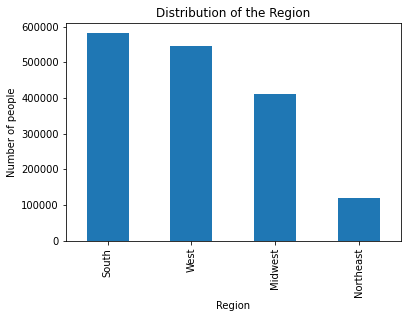

In [10]:
regions.plot.bar()
plt.xlabel("Region")
plt.ylabel("Number of people")
plt.title("Distribution of the Region")

DIVISION

Text(0.5, 1.0, 'Distribution of the Division')

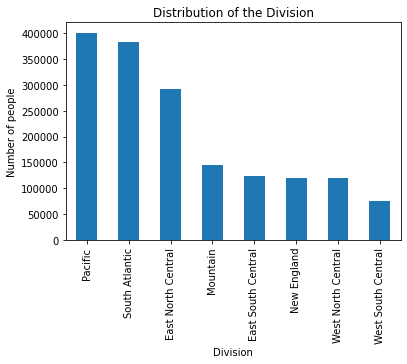

In [11]:
division_df = df_new['DIVISION'].value_counts()

division_df.plot.bar()
plt.xlabel("Division")
plt.ylabel("Number of people")
plt.title("Distribution of the Division")

AGEP - Age of Population 

In [19]:
df_new['AGEP'].describe()

count    1.658808e+06
mean     4.240842e+01
std      2.379314e+01
min      0.000000e+00
25%      2.200000e+01
50%      4.300000e+01
75%      6.200000e+01
max      9.600000e+01
Name: AGEP, dtype: float64

In [20]:
df_new['AGEP'].describe()['max']

96.0

In [21]:
df_new['AGEP'].describe()['min']

0.0

In [ ]:
### group the age into bins

bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-17','18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_new['AGE_RANGE'] = pd.cut(df_new.AGEP, bins, labels = labels,include_lowest = True)
df_new.head(10)

In [23]:
df_new.to_csv("psam_pusa_new.csv")

Text(0.5, 1.0, 'Distribution of the ages')

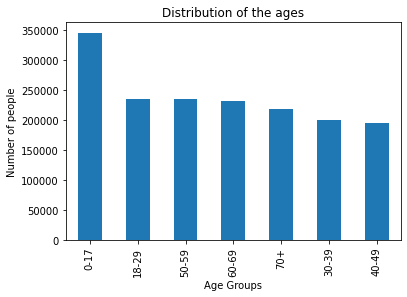

In [27]:
ages = df_new['AGE_RANGE'].value_counts()
ages.sort_index()
ages.plot.bar()
plt.xlabel("Age Groups")
plt.ylabel("Number of people")
plt.title("Distribution of the ages")

In [28]:
ages

0-17     345694
18-29    235049
50-59    234233
60-69    231160
70+      218091
30-39    199707
40-49    194874
Name: AGE_RANGE, dtype: int64

In [ ]:
df_new.dtypes

DEYE - Vision Difficulty


In [32]:
vision = df_new['DEYE'].value_counts()

In [33]:
vision

no     1616694
yes      42114
Name: DEYE, dtype: int64

Text(0.5, 1.0, 'Distribution of the Vision Difficulty')

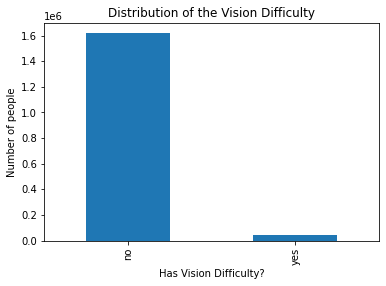

In [42]:
vision.plot.bar()
plt.xlabel("Has Vision Difficulty?")
plt.ylabel("Number of people")
plt.title("Distribution of the Vision Difficulty")

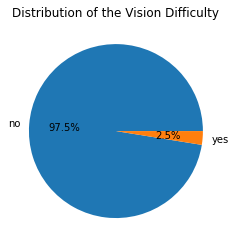

In [41]:
plt.pie(vision,labels=vision.index,autopct='%1.1f%%')

#plt.axis('equal')
plt.title("Distribution of the Vision Difficulty")
plt.show()

SEX


In [46]:
gender = df_new['SEX'].value_counts()

Text(0.5, 1.0, 'Distribution of the sex')

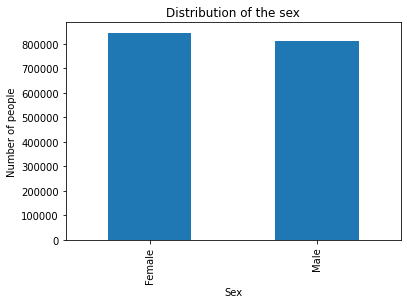

In [49]:
gender.plot.bar()
plt.xlabel("Sex")
plt.ylabel("Number of people")
plt.title("Distribution of the sex")

In [48]:
gender

Female    845854
Male      812954
Name: SEX, dtype: int64

Age and Vision Difficulty

Text(0, 0.5, 'Age')

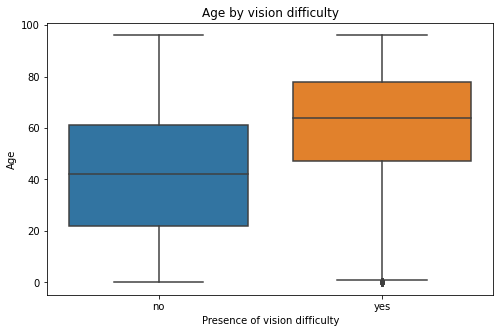

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DEYE',y='AGEP',data=df_new)
plt.title("Age by vision difficulty")
plt.xlabel("Presence of vision difficulty")
plt.ylabel("Age")

Gender and Vision Difficulty

In [60]:
df_new2 = df_new[df_new['DEYE'] == 'yes']
df_new2.describe()

,AGEP,COW,NWAV,NWLA,NWLK,SCH,SCHG,SCHL,WKL,DIS,ESR,FOD1P,FOD2P,HICOV,INDP,OCCP,PERNP,PINCP,POWSP,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACWHT,SCIENGP,SCIENGRLP,FDEYEP,PWGTP1
count,42114.000000,15411.000000,40141.000000,40141.000000,40141.000000,41985.000000,3818.000000,41985.000000,40141.000000,42114.0,40141.000000,6714.000000,689.000000,42114.000000,15411.000000,15411.000000,4.014100e+04,4.036700e+04,9475.000000,42114.000000,42114.00000,42114.000000,42114.000000,42114.000000,42114.000000,42114.000000,6714.000000,6714.000000,42114.000000,42114.000000
mean,60.350786,2.288949,4.740913,2.404748,2.381156,1.104776,11.250393,16.032011,2.335816,1.0,4.725019,4307.642836,4455.499274,1.069597,6318.075336,4668.158912,1.159311e+04,2.754627e+04,14.513456,1.882248,7.75932,2.839317,0.026618,0.046707,0.154580,0.752505,1.668007,1.893208,0.085316,95.114926
std,22.591261,2.065638,0.848979,0.501395,0.536656,0.348536,4.328308,4.892195,0.891207,0.0,2.140498,1708.439782,1630.469406,0.254469,2727.365076,2675.584538,3.682296e+04,4.671269e+04,10.884646,2.041603,18.54720,6.834926,0.160967,0.211012,0.361509,0.431562,0.470964,0.308871,0.279355,107.949357
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1100.000000,1100.000000,1.000000,170.000000,10.000000,-8.000000e+03,-7.980000e+03,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,5.000000,2.000000,2.000000,1.000000,8.000000,15.000000,1.000000,1.0,3.000000,2399.000000,2602.000000,1.000000,4870.000000,2861.000000,0.000000e+00,7.800000e+03,6.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,28.000000
50%,64.000000,1.000000,5.000000,2.000000,2.000000,1.000000,13.000000,16.000000,3.000000,1.0,6.000000,5004.000000,5098.000000,1.000000,7390.000000,4600.000000,0.000000e+00,1.500000e+04,13.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,64.000000
75%,78.000000,3.000000,5.000000,3.000000,3.000000,1.000000,15.000000,19.000000,3.000000,1.0,6.000000,6107.000000,6006.000000,1.000000,8370.000000,6230.000000,4.300000e+03,3.200000e+04,21.000000,2.000000,2.00000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,120.000000
max,96.000000,9.000000,5.000000,3.000000,3.000000,3.000000,16.000000,24.000000,3.000000,1.0,6.000000,6403.000000,6403.000000,2.000000,9920.000000,9920.000000,1.050000e+06,1.353000e+06,399.000000,9.000000,68.00000,100.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1971.000000


Text(0.5, 1.0, 'Distribution of the sex amongst the visually impaired')

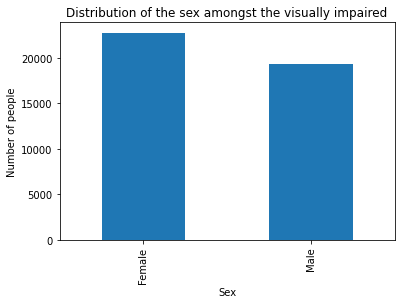

In [61]:
gender2 = df_new2['SEX'].value_counts()
gender2.plot.bar()
plt.xlabel("Sex")
plt.ylabel("Number of people")
plt.title("Distribution of the sex amongst the visually impaired")